### Client: ABC Tech | Category: ITSM - ML
### Project Ref: PM-PR-0012

### Problem Statement

ABC Tech’s mature ITIL-based incident management process is no longer meeting customer expectations, with rising dissatisfaction due to inefficiencies in ticket prioritization, routing, and proactive handling. To fix these challenges and improve customer satisfaction, ABC Tech needs a smarter, faster way — like using Machine Learning — to predict, automate, and manage incidents better.

- Objective:
1. Our goal is to predict high-priority incidents for proactive resolution.
2. To forecast incident volumes for better resource planning.
3. To auto-tag tickets with the right priority and department to reduce delays.
4. To predict RFC failures to prevent service disruptions.

### 1.Importing Libraries

In [5]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport

#Importing 
from sklearn.preprocessing import*

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance for classification models
from sklearn.metrics import *

# Importing LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Importing XGBClassifier
from xgboost import XGBClassifier

# Importing DecisionTreeClassifier model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Importing RandomForestClassifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Importing SVC model from sklearn
from sklearn.svm import SVC

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.multioutput import MultiOutputClassifier

#Importing Kneighborsclassifier model from sklearn
from sklearn.neighbors import KNeighborsClassifier

#Importing Naive_bayes
from sklearn.naive_bayes import GaussianNB

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Importing SMOTE
from imblearn.over_sampling import SMOTE

### 2.Loading Data

In [7]:
# # Connect to the database
# conn = mysql.connector.connect(
#     host='*8.1**.1*7.***',
#     user='d*_t**m',
#     password='D**$****@&***20*',
#     database='project_itsm'
# )

# # Write your query
# query = "SELECT * FROM dataset_list;"  # Replace with your table

# # Load data into a DataFrame
# df = pd.read_sql(query, conn)

# # Show the data
# print(df.head())

# # Close the connection
# conn.close()

In [8]:
# df.to_csv('ITSM.csv', index=False)

To maintain privacy and security, I avoided hardcoding the username and password in the code. Instead, I retrieved the data from the SQL database and exported it to a CSV file.

In [10]:
data=pd.read_csv('ITSM.csv')
pd.set_option('display.max_columns',None)
data

CI_Name          CI_Cat                 CI_Subcat        WBS  \
0      SUB000508  subapplication     Web Based Application  WBS000162   
1      WBA000124     application     Web Based Application  WBS000088   
2      DTA000024     application       Desktop Application  WBS000092   
3      WBA000124     application     Web Based Application  WBS000088   
4      WBA000124     application     Web Based Application  WBS000088   
...          ...             ...                       ...        ...   
46601  SBA000464     application  Server Based Application  WBS000073   
46602  SBA000461     application  Server Based Application  WBS000073   
46603  LAP000019        computer                    Laptop  WBS000091   
46604  WBA000058     application     Web Based Application  WBS000073   
46605  DCE000077        hardware       DataCenterEquipment  WBS000267   

      Incident_ID  Status Impact Urgency  Priority  number_cnt  \
0       IM0000004  Closed      4       4       4.0    0.601292   
1       IM0000005  Closed      3       3       3.0    0.415050   
2       IM0000006  Closed     NS       3       NaN    0.517551   
3       IM0000011  Closed      4       4       4.0    0.642927   
4       IM0000012  Closed      4       4       4.0    0.345258   
...           ...     ...    ...     ...       ...         ...   
46601   IM0047053  Closed      4       4       4.0    0.231896   
46602   IM0047054  Closed      4       4       4.0    0.805153   
46603   IM0047055  Closed      5       5       5.0    0.917466   
46604   IM0047056  Closed      4       4       4.0    0.701278   
46605   IM0047057  Closed      3       3       3.0    0.902320   

                      Category  KB_number Alert_Status  No_of_Reassignments  \
0                     incident  KM0000553       closed                 26.0   
1                     incident  KM0000611       closed                 33.0   
2      request for information  KM0000339       closed                  3.0   
3                     incident  KM0000611       closed                 13.0   
4                     incident  KM0000611       closed                  2.0   
...                        ...        ...          ...                  ...   
46601                 incident  KM0001314       closed                  0.0   
46602                 incident  KM0002360       closed                  0.0   
46603                 incident  KM0000315       closed                  0.0   
46604                 incident  KM0001287       closed                  0.0   
46605                 incident  KM0000182       closed                  0.0   

              Open_Time       Reopen_Time     Resolved_Time        Close_Time  \
0      05-02-2012 13:32               NaN  04-11-2013 13:50  04-11-2013 13:51   
1      12-03-2012 15:44  02-12-2013 12:31  02-12-2013 12:36  02-12-2013 12:36   
2      29-03-2012 12:36               NaN  13-01-2014 15:12  13-01-2014 15:13   
3      17-07-2012 11:49               NaN  14-11-2013 09:31  14-11-2013 09:31   
4      10-08-2012 11:01               NaN  08-11-2013 13:55  08-11-2013 13:55   
...                 ...               ...               ...               ...   
46601  31-03-2014 16:23               NaN  31-03-2014 16:29  31-03-2014 16:29   
46602  31-03-2014 15:03               NaN  31-03-2014 15:29  31-03-2014 15:29   
46603  31-03-2014 15:28               NaN  31-03-2014 15:32  31-03-2014 15:32   
46604  31-03-2014 15:35               NaN  31-03-2014 15:42  31-03-2014 15:42   
46605  31-03-2014 17:24               NaN  31-03-2014 22:47  31-03-2014 22:47   

      Handle_Time_hrs                  Closure_Code  \
0      3,87,16,91,111                         Other   
1      4,35,47,86,389                      Software   
2      4,84,31,19,444  No error - works as designed   
3      4,32,18,33,333                Operator error   
4      3,38,39,03,333                         Other   
...               ...                           ...   
46601           0,095           

### 3.Domain Analysis

1. CI_Name: Name or ID of the Configuration Item (CI) linked to the incident.
2. CI_Cat: Category of the Configuration Item (e.g., application, hardware).
3. CI_Subcat: Sub-category giving more detail about the CI type (e.g., Desktop Application, Web Based Application).
4. WBS: Work Breakdown Structure code associated with the CI/project.
5. Incident_ID: Unique ID assigned to each incident or ticket raised.
6. Status: Current status of the incident (e.g., Open, Closed).
7. Impact: How severely the incident affects the business (on a scale, usually 1-5).
8. Urgency: How quickly the incident needs to be resolved (on a scale, usually 1-5).
9. Priority: Priority level calculated based on Impact and Urgency.
10. number_cnt: Numerical value that may represent an internal metric or weight for the ticket.
11. Category: General type of request (e.g., incident, service request, information request).
12. KB_number: Knowledge Base reference number linked to resolving this ticket.
13. Alert_Status: Status of system alerts (e.g., triggered, closed) linked to the incident.
14. No_of_Reassignments: Number of times the ticket was reassigned between different teams.
15. Open_Time: Date and time when the incident was initially opened.
16. Reopen_Time: Date and time when the incident was reopened (if it was closed and reopened).
17. Resolved_Time: Date and time when the incident was marked as resolved.
18. Close_Time: Date and time when the incident was officially closed.
19. Handle_Time_hrs: Total time taken to handle and close the incident (in hours, but messy format).
20. Closure_Code: Reason or type of closure (e.g., operator error, software issue).
21. No_of_Related_Interactions: Number of customer interactions related to this incident.
22. Related_Interaction: ID(s) of interaction records linked to this incident.
23. No_of_Related_Incidents: Number of other incidents related to this one.
24. No_of_Relate_Changes: Number of changes related to this incident (often empty).
25. Related_Change: ID(s) of change requests associated with the incident (often empty).


### 4.Basic Checks

In [14]:
data.head()

CI_Name          CI_Cat              CI_Subcat        WBS Incident_ID  \
0  SUB000508  subapplication  Web Based Application  WBS000162   IM0000004   
1  WBA000124     application  Web Based Application  WBS000088   IM0000005   
2  DTA000024     application    Desktop Application  WBS000092   IM0000006   
3  WBA000124     application  Web Based Application  WBS000088   IM0000011   
4  WBA000124     application  Web Based Application  WBS000088   IM0000012   

   Status Impact Urgency  Priority  number_cnt                 Category  \
0  Closed      4       4       4.0    0.601292                 incident   
1  Closed      3       3       3.0    0.415050                 incident   
2  Closed     NS       3       NaN    0.517551  request for information   
3  Closed      4       4       4.0    0.642927                 incident   
4  Closed      4       4       4.0    0.345258                 incident   

   KB_number Alert_Status  No_of_Reassignments         Open_Time  \
0  KM0000553       closed                 26.0  05-02-2012 13:32   
1  KM0000611       closed                 33.0  12-03-2012 15:44   
2  KM0000339       closed                  3.0  29-03-2012 12:36   
3  KM0000611       closed                 13.0  17-07-2012 11:49   
4  KM0000611       closed                  2.0  10-08-2012 11:01   

        Reopen_Time     Resolved_Time        Close_Time Handle_Time_hrs  \
0               NaN  04-11-2013 13:50  04-11-2013 13:51  3,87,16,91,111   
1  02-12-2013 12:31  02-12-2013 12:36  02-12-2013 12:36  4,35,47,86,389   
2               NaN  13-01-2014 15:12  13-01-2014 15:13  4,84,31,19,444   
3               NaN  14-11-2013 09:31  14-11-2013 09:31  4,32,18,33,333   
4               NaN  08-11-2013 13:55  08-11-2013 13:55  3,38,39,03,333   

                   Closure_Code  No_of_Related_Interactions  \
0                         Other                         1.0   
1                      Software                         1.0   
2  No error - works as designed                         1.0   
3                Operator error                         1.0   
4                         Other                         1.0   

  Related_Interaction  No_of_Related_Incidents  No_of_Related_Changes  \
0           SD0000007                      2.0                    NaN   
1           SD0000011                      1.0                    NaN   
2           SD0000017                      NaN                    NaN   
3           SD0000025                      NaN                    NaN   
4           SD0000029                      NaN                    NaN   

  Related_Change  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [15]:
data.tail()

CI_Name       CI_Cat                 CI_Subcat        WBS  \
46601  SBA000464  application  Server Based Application  WBS000073   
46602  SBA000461  application  Server Based Application  WBS000073   
46603  LAP000019     computer                    Laptop  WBS000091   
46604  WBA000058  application     Web Based Application  WBS000073   
46605  DCE000077     hardware       DataCenterEquipment  WBS000267   

      Incident_ID  Status Impact Urgency  Priority  number_cnt  Category  \
46601   IM0047053  Closed      4       4       4.0    0.231896  incident   
46602   IM0047054  Closed      4       4       4.0    0.805153  incident   
46603   IM0047055  Closed      5       5       5.0    0.917466  incident   
46604   IM0047056  Closed      4       4       4.0    0.701278  incident   
46605   IM0047057  Closed      3       3       3.0    0.902320  incident   

       KB_number Alert_Status  No_of_Reassignments         Open_Time  \
46601  KM0001314       closed                  0.0  31-03-2014 16:23   
46602  KM0002360       closed                  0.0  31-03-2014 15:03   
46603  KM0000315       closed                  0.0  31-03-2014 15:28   
46604  KM0001287       closed                  0.0  31-03-2014 15:35   
46605  KM0000182       closed                  0.0  31-03-2014 17:24   

      Reopen_Time     Resolved_Time        Close_Time Handle_Time_hrs  \
46601         NaN  31-03-2014 16:29  31-03-2014 16:29           0,095   
46602         NaN  31-03-2014 15:29  31-03-2014 15:29     0,428333333   
46603         NaN  31-03-2014 15:32  31-03-2014 15:32     0,071666667   
46604         NaN  31-03-2014 15:42  31-03-2014 15:42     0,116944444   
46605         NaN  31-03-2014 22:47  31-03-2014 22:47     0,586388889   

      Closure_Code  No_of_Related_Interactions Related_Interaction  \
46601        Other                         1.0           SD0147021   
46602   User error                         1.0           SD0146967   
46603     Hardware                         1.0           SD0146982   
46604     Software                         1.0           SD0146986   
46605     Hardware                         1.0           SD0147088   

       No_of_Related_Incidents  No_of_Related_Changes Related_Change  
46601                      NaN                    NaN            NaN  
46602                      NaN                    NaN            NaN  
46603                      NaN                    NaN            NaN  
46604                      NaN                    NaN            NaN  
46605                      NaN                    NaN            NaN

In [16]:
data.sample(6)

CI_Name          CI_Cat                 CI_Subcat        WBS  \
1771   WBA000011     application     Web Based Application  WBS000152   
3288   WBA000144     application     Web Based Application  WBS000318   
13550  WBA000011     application     Web Based Application  WBS000152   
31147  SBA000813     application  Server Based Application  WBS000250   
26475  SUB000113  subapplication  Server Based Application  WBS000095   
2656   DTA000591     application       Desktop Application  WBS000092   

      Incident_ID  Status Impact Urgency  Priority  number_cnt  \
1771    IM0001879  Closed      5       5       5.0    0.206998   
3288    IM0003408  Closed      4       4       4.0    0.321139   
13550   IM0013745  Closed      4       4       4.0    0.105087   
31147   IM0031434  Closed      3       3       3.0    0.096285   
26475   IM0026744  Closed      5       5       5.0    0.207956   
2656    IM0002772  Closed      4       4       4.0    0.362563   

                      Category  KB_number Alert_Status  No_of_Reassignments  \
1771                  incident  KM0000081       closed                  0.0   
3288                  incident  KM0000838       closed                  1.0   
13550                 incident  KM0001626       closed                  0.0   
31147                 incident  KM0000951       closed                  0.0   
26475  request for information  KM0000226       closed                  0.0   
2656                  incident  KM0000468       closed                  2.0   

              Open_Time Reopen_Time     Resolved_Time        Close_Time  \
1771   02-10-2013 10:58         NaN  02-10-2013 11:06  02-10-2013 11:06   
3288   07-10-2013 17:37         NaN  08-10-2013 15:13  08-10-2013 15:13   
13550  14-11-2013 15:58         NaN  25-11-2013 14:27  25-11-2013 14:28   
31147  27-01-2014 13:16         NaN  05-02-2014 13:59  05-02-2014 13:59   
26475  09-01-2014 08:52         NaN  09-01-2014 09:43  09-01-2014 09:43   
2656   04-10-2013 13:30         NaN  07-10-2013 15:02  07-10-2013 15:03   

      Handle_Time_hrs    Closure_Code  No_of_Related_Interactions  \
1771      0,136944444        Software                         1.0   
3288   8,10,72,22,222           Other                         1.0   
13550  7,19,88,33,333  Operator error                         2.0   
31147  3,68,32,77,778         Unknown                         1.0   
26475     0,855555556           Other                         1.0   
2656   1,16,91,66,667            Data                         1.0   

      Related_Interaction  No_of_Related_Incidents  No_of_Related_Changes  \
1771            SD0003240                      NaN                    NaN   
3288            SD0007454                      NaN                    NaN   
13550         #MULTIVALUE                      NaN                    NaN   
31147           SD0095181                      NaN                    NaN   
26475           SD0080080                      NaN                    NaN   
2656            SD0005795                      NaN                    NaN   

      Related_Change  
1771             NaN  
3288             NaN  
13550            NaN  
31147            NaN  
26475            NaN  
2656             NaN

In [17]:
data.shape

(46606, 25)

In [18]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [20]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [21]:
for col in data:
    print(col)
    print(data[col].unique())
    print(f'Number of unique values:{data[col].nunique()}')
    print(' ')

CI_Name
['SUB000508' 'WBA000124' 'DTA000024' ... 'CBD000595' 'CBD000443'
 'SWT000008']
Number of unique values:3019
 
CI_Cat
['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
Number of unique values:12
 
CI_Subcat
['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 'Controller'
 'DataCenterEquipment' 'KVM Switches' 'Switch' 'Database Software'
 'Network Component' 'Unix Server' 'Lines' 'ESX Cluster' 'zOS Server'
 'SharePoint Farm' 'NonStop Server' 'Application Server'
 'Security Software' 'Thin Client' 'zOS Cluster' 'Router' 'VMW

In [22]:
for i in data:
    print(data[i].value_counts())
    print(' ')

CI_Name
SUB000456    3050
SBA000263    2176
SBA000607    1743
SBA000462    1698
WBA000058    1614
             ... 
LAP001572       1
LAP000809       1
LAP000513       1
CBD000266       1
SWT000008       1
Name: count, Length: 3019, dtype: int64
 
CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64
 
CI_Subcat
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Securit

In [23]:
data.describe()

Priority    number_cnt  No_of_Reassignments  \
count  45226.000000  46606.000000         46605.000000   
mean       4.215805      0.499658             1.131831   
std        0.705624      0.288634             2.269774   
min        1.000000      0.000023             0.000000   
25%        4.000000      0.248213             0.000000   
50%        4.000000      0.500269             0.000000   
75%        5.000000      0.749094             2.000000   
max        5.000000      0.999997            46.000000   

       No_of_Related_Interactions  No_of_Related_Incidents  \
count                46492.000000              1222.000000   
mean                     1.149897                 1.669394   
std                      2.556338                 3.339687   
min                      1.000000                 1.000000   
25%                      1.000000                 1.000000   
50%                      1.000000                 1.000000   
75%                      1.000000                 1.000000   
max                    370.000000                63.000000   

       No_of_Related_Changes  
count             560.000000  
mean                1.058929  
std                 0.403596  
min                 1.000000  
25%                 1.000000  
50%                 1.000000  
75%                 1.000000  
max                 9.000000

### 5.Exploratory Data Analysis

In [25]:
report=ProfileReport(data,title='ITSM Report',explorative=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
df=pd.read_csv('ITSM.csv')

In [27]:
df.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [28]:
#dropping unrequired columns and printing the columns having null values
df.drop(columns=[
    'Handle_Time_hrs',
    'Alert_Status',
    'No_of_Related_Incidents',
    'No_of_Related_Changes',
    'Related_Change','Reopen_Time'
], inplace=True)

null_summary = df.isnull().sum()
print("Remaining Nulls:\n", null_summary[null_summary > 0])


Remaining Nulls:
 CI_Cat                         111
CI_Subcat                      111
Priority                      1380
No_of_Reassignments              1
Resolved_Time                 1780
Closure_Code                   460
No_of_Related_Interactions     114
dtype: int64


In [29]:
df['Open_Time'] = pd.to_datetime(df['Open_Time'], errors='coerce')
df['Resolved_Time'] = pd.to_datetime(df['Resolved_Time'], errors='coerce')
df['Close_Time'] = pd.to_datetime(df['Close_Time'], errors='coerce')

df['Impact'] = pd.to_numeric(df['Impact'], errors='coerce')
df['Urgency'] = pd.to_numeric(df['Urgency'], errors='coerce')
df['Priority'] = pd.to_numeric(df['Priority'], errors='coerce')
df['No_of_Reassignments'] = pd.to_numeric(df['No_of_Reassignments'], errors='coerce')
df['No_of_Related_Interactions'] = pd.to_numeric(df['No_of_Related_Interactions'], errors='coerce')

categorical_cols = ['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 
                    'Status', 'Category', 'KB_number', 'Closure_Code', 'Related_Interaction']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [30]:
df['Impact'].fillna(df['Impact'].mode()[0], inplace=True)
df['Priority'].fillna(df['Priority'].mode()[0], inplace=True)

df['Urgency'].fillna(df['Urgency'].mode()[0], inplace=True)

df['No_of_Reassignments'].fillna(df['No_of_Reassignments'].median(), inplace=True)

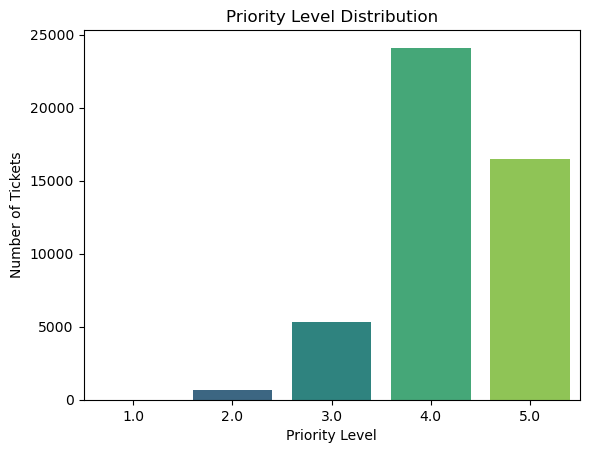

In [31]:
sns.countplot(data=df, x='Priority', palette='viridis')
plt.title('Priority Level Distribution')
plt.xlabel('Priority Level')
plt.ylabel('Number of Tickets')
plt.show()

In [32]:
pivot_table = df.pivot_table(index='CI_Cat', columns='Priority', aggfunc='size', fill_value=0)
print(pivot_table)

Priority              1.0  2.0   3.0    4.0    5.0
CI_Cat                                            
Phone                   0    1     1      0      0
application             1  194  4017  16491  12197
applicationcomponent    0    0     3      2      0
computer                0  425   372    831   2015
database                0    0   144     62      8
displaydevice           0    0     1    201     10
hardware                0    6   143    115    178
networkcomponents       0   22    34     39     12
officeelectronics       0    0    37     78     37
software                0    3   131    150     49
storage                 0    5   188    396    114
subapplication          2   33   239   5701   1807


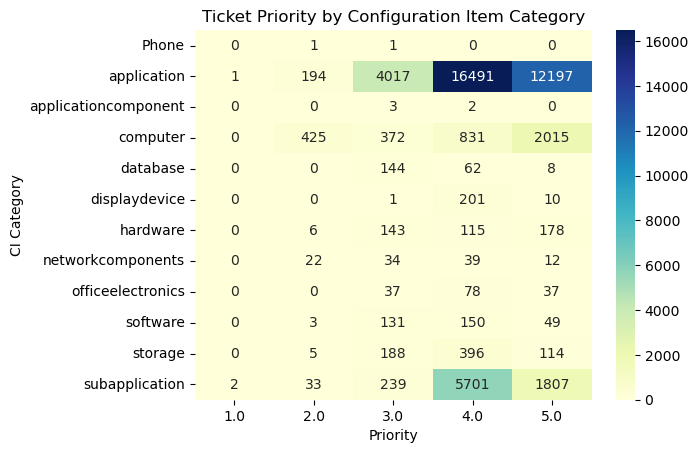

In [33]:
pivot_table = df.pivot_table(index='CI_Cat', columns='Priority', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu',fmt='g')
plt.title('Ticket Priority by Configuration Item Category')
plt.ylabel('CI Category')
plt.xlabel('Priority')
plt.show()

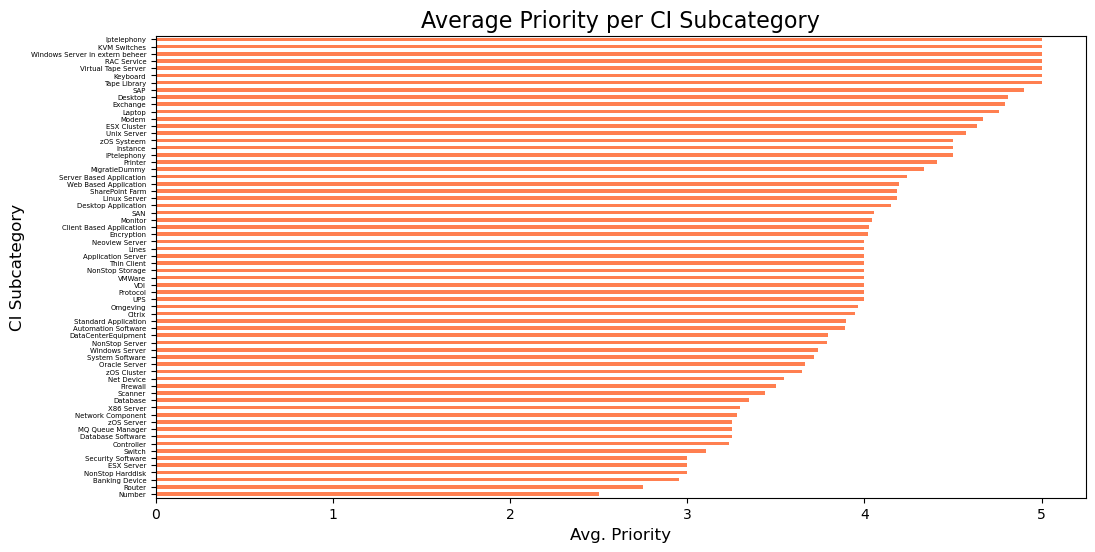

In [34]:
plt.figure(figsize=(12, 6))  

avg_priority_by_subcat = df.groupby('CI_Subcat')['Priority'].mean().sort_values()

avg_priority_by_subcat.plot(kind='barh', color='coral')

plt.title('Average Priority per CI Subcategory', fontsize=16)
plt.xlabel('Avg. Priority', fontsize=12)
plt.ylabel('CI Subcategory', fontsize=12)

plt.yticks(fontsize=5, rotation=0)  

plt.show()

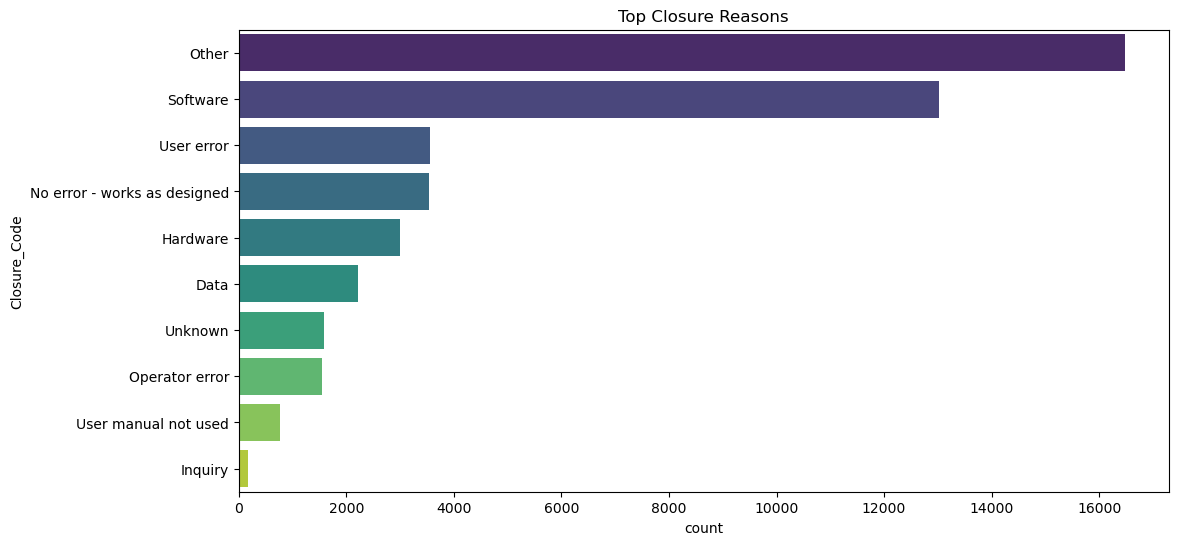

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Closure_Code', order=df['Closure_Code'].value_counts().index[:10], palette='viridis')
plt.title('Top Closure Reasons')
plt.show()

Insights:
1. Tickets with low priority occur most frequently across the dataset.
2. The subcategory 'number' is associated with a relatively low average priority.
3. 'Software' ranks as the second most common closure reason.
4. Most low-priority tickets are associated with the application category, indicating lower urgency for application-related issues.

### 6.Data Preprocessing

#### 6.1. Encoding

In [39]:
data.drop(columns=['Alert_Status','Reopen_Time','No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],inplace=True)

In [40]:
le_cols=['CI_Cat','CI_Subcat','Status','Closure_Code', 'Category']
le=LabelEncoder()
for col in le_cols:
    data[col]=le.fit_transform(data[col])

In [41]:
data.dropna(inplace=True)
data

CI_Name  CI_Cat  CI_Subcat        WBS Incident_ID  Status Impact  \
0      SUB000508      11         57  WBS000162   IM0000004       0      4   
1      WBA000124       1         57  WBS000088   IM0000005       0      3   
3      WBA000124       1         57  WBS000088   IM0000011       0      4   
4      WBA000124       1         57  WBS000088   IM0000012       0      4   
5      WBA000124       1         57  WBS000088   IM0000013       0      4   
...          ...     ...        ...        ...         ...     ...    ...   
46601  SBA000464       1         45  WBS000073   IM0047053       0      4   
46602  SBA000461       1         45  WBS000073   IM0047054       0      4   
46603  LAP000019       3         21  WBS000091   IM0047055       0      5   
46604  WBA000058       1         57  WBS000073   IM0047056       0      4   
46605  DCE000077       6          6  WBS000267   IM0047057       0      3   

      Urgency  Priority  number_cnt  Category  KB_number  No_of_Reassignments  \
0           4       4.0    0.601292         1  KM0000553                 26.0   
1           3       3.0    0.415050         1  KM0000611                 33.0   
3           4       4.0    0.642927         1  KM0000611                 13.0   
4           4       4.0    0.345258         1  KM0000611                  2.0   
5           4       4.0    0.006676         1  KM0000611                  4.0   
...       ...       ...         ...       ...        ...                  ...   
46601       4       4.0    0.231896         1  KM0001314                  0.0   
46602       4       4.0    0.805153         1  KM0002360                  0.0   
46603       5       5.0    0.917466         1  KM0000315                  0.0   
46604       4       4.0    0.701278         1  KM0001287                  0.0   
46605       3       3.0    0.902320         1  KM0000182                  0.0   

              Open_Time     Resolved_Time        Close_Time Handle_Time_hrs  \
0      05-02-2012 13:32  04-11-2013 13:50  04-11-2013 13:51  3,87,16,91,111   
1      12-03-2012 15:44  02-12-2013 12:36  02-12-2013 12:36  4,35,47,86,389   
3      17-07-2012 11:49  14-11-2013 09:31  14-11-2013 09:31  4,32,18,33,333   
4      10-08-2012 11:01  08-11-2013 13:55  08-11-2013 13:55  3,38,39,03,333   
5      10-08-2012 11:27  08-11-2013 13:54  08-11-2013 13:54  3,38,34,36,944   
...                 ...               ...               ...             ...   
46601  31-03-2014 16:23  31-03-2014 16:29  31-03-2014 16:29           0,095   
46602  31-03-2014 15:03  31-03-2014 15:29  31-03-2014 15:29     0,428333333   
46603  31-03-2014 15:28  31-03-2014 15:32  31-03-2014 15:32     0,071666667   
46604  31-03-2014 15:35  31-03-2014 15:42  31-03-2014 15:42     0,116944444   
46605  31-03-2014 17:24  31-03-2014 22:47  31-03-2014 22:47     0,586388889   

       Closure_Code  No_of_Related_Interactions Related_Interaction  
0                 6                         1.0           SD0000007  
1                10                         1.0           SD0000011  
3                 5                         1.0           SD0000025  
4                 6                         1.0           SD0000029  
5                 6                         1.0           SD0000031  
...             ...                         ...                 ...  
46601             6                         1.0           SD0147021  
46602            12                         1.0           SD0146967  
46603             1                         1.0           SD0146982  
46604            10                         1.0           SD0146986  
46605             1                         1.0           SD0147088  

[43467 rows x 20 columns]

In [42]:
data['Urgency'] = data['Urgency'].astype(str).str.extract('(\d)').astype(int)

In [43]:
data['Impact']= data['Impact'].astype(str).str.extract('(\d)').astype(int)

In [44]:
#final preprocessed data
data

CI_Name  CI_Cat  CI_Subcat        WBS Incident_ID  Status  Impact  \
0      SUB000508      11         57  WBS000162   IM0000004       0       4   
1      WBA000124       1         57  WBS000088   IM0000005       0       3   
3      WBA000124       1         57  WBS000088   IM0000011       0       4   
4      WBA000124       1         57  WBS000088   IM0000012       0       4   
5      WBA000124       1         57  WBS000088   IM0000013       0       4   
...          ...     ...        ...        ...         ...     ...     ...   
46601  SBA000464       1         45  WBS000073   IM0047053       0       4   
46602  SBA000461       1         45  WBS000073   IM0047054       0       4   
46603  LAP000019       3         21  WBS000091   IM0047055       0       5   
46604  WBA000058       1         57  WBS000073   IM0047056       0       4   
46605  DCE000077       6          6  WBS000267   IM0047057       0       3   

       Urgency  Priority  number_cnt  Category  KB_number  \
0            4       4.0    0.601292         1  KM0000553   
1            3       3.0    0.415050         1  KM0000611   
3            4       4.0    0.642927         1  KM0000611   
4            4       4.0    0.345258         1  KM0000611   
5            4       4.0    0.006676         1  KM0000611   
...        ...       ...         ...       ...        ...   
46601        4       4.0    0.231896         1  KM0001314   
46602        4       4.0    0.805153         1  KM0002360   
46603        5       5.0    0.917466         1  KM0000315   
46604        4       4.0    0.701278         1  KM0001287   
46605        3       3.0    0.902320         1  KM0000182   

       No_of_Reassignments         Open_Time     Resolved_Time  \
0                     26.0  05-02-2012 13:32  04-11-2013 13:50   
1                     33.0  12-03-2012 15:44  02-12-2013 12:36   
3                     13.0  17-07-2012 11:49  14-11-2013 09:31   
4                      2.0  10-08-2012 11:01  08-11-2013 13:55   
5                      4.0  10-08-2012 11:27  08-11-2013 13:54   
...                    ...               ...               ...   
46601                  0.0  31-03-2014 16:23  31-03-2014 16:29   
46602                  0.0  31-03-2014 15:03  31-03-2014 15:29   
46603                  0.0  31-03-2014 15:28  31-03-2014 15:32   
46604                  0.0  31-03-2014 15:35  31-03-2014 15:42   
46605                  0.0  31-03-2014 17:24  31-03-2014 22:47   

             Close_Time Handle_Time_hrs  Closure_Code  \
0      04-11-2013 13:51  3,87,16,91,111             6   
1      02-12-2013 12:36  4,35,47,86,389            10   
3      14-11-2013 09:31  4,32,18,33,333             5   
4      08-11-2013 13:55  3,38,39,03,333             6   
5      08-11-2013 13:54  3,38,34,36,944             6   
...                 ...             ...           ...   
46601  31-03-2014 16:29           0,095             6   
46602  31-03-2014 15:29     0,428333333            12   
46603  31-03-2014 15:32     0,071666667             1   
46604  31-03-2014 15:42     0,116944444            10   
46605  31-03-2014 22:47     0,586388889             1   

       No_of_Related_Interactions Related_Interaction  
0                             1.0           SD0000007  
1                             1.0           SD0000011  
3                             1.0           SD0000025  
4                             1.0           SD0000029  
5                             1.0           SD0000031  
...                           ...                 ...  
46601                         1.0           SD0147021  
46602                         1.0           SD0146967  
46603                         1.0           SD0146982  
46604                         1.0           SD0146986  
46605                         1.0           SD0147088  

[43467 rows x 20 columns]

### 7. To predict high-priority(1 & 2) incidents for proactive resolution.

In [46]:
df1=data.copy()

In [47]:
#encoding CI_Name feature
ci_name_freq = data['CI_Name'].value_counts(normalize=True)
df1['CI_Name'] = df1['CI_Name'].map(ci_name_freq)

In [48]:
#creating a target column
df1['Priority'] = df1['Priority'].astype(int)
df1['High_Priority_Flag'] = df1['Priority'].apply(lambda x: 1 if x in [1, 2] else 0)

In [49]:
df1['High_Priority_Flag'].value_counts()

High_Priority_Flag
0    43051
1      416
Name: count, dtype: int64

In [50]:
high_priority_conditions = (
    ((df1['Impact'] == 1) & (df1['Urgency'].isin([1, 2]))) |
    ((df1['Impact'] == 2) & (df1['Urgency'].isin([1, 2,3]))) |
    ((df1['Impact'] == 3) & (df1['Urgency'].isin([1,2])))
)

df_high_priority = df1[high_priority_conditions]
df_high_priority

CI_Name  CI_Cat  CI_Subcat        WBS Incident_ID  Status  Impact  \
849    0.000023       3         58  WBS000102   IM0000944       0       2   
1185   0.000046       3          2  WBS000146   IM0001285       0       2   
1186   0.000023       3          2  WBS000146   IM0001286       0       2   
1203   0.006902       1         57  WBS000172   IM0001303       0       2   
1221   0.000046       3          2  WBS000146   IM0001321       0       2   
...         ...     ...        ...        ...         ...     ...     ...   
46362  0.049555       1         45  WBS000072   IM0046810       0       2   
46386  0.010560       1          3  WBS000335   IM0046835       0       2   
46416  0.020774       1         57  WBS000152   IM0046865       0       3   
46482  0.000023       7         48  WBS000281   IM0046932       0       2   
46551  0.007247       1         10  WBS000330   IM0047003       0       2   

       Urgency  Priority  number_cnt  Category  KB_number  \
849          2         2    0.798444         1  KM0000972   
1185         2         2    0.570667         1  KM0000491   
1186         2         2    0.463489         1  KM0000491   
1203         2         2    0.162129         1  KM0001979   
1221         2         2    0.481147         1  KM0000274   
...        ...       ...         ...       ...        ...   
46362        2         2    0.736677         3  KM0001807   
46386        2         2    0.514474         1  KM0001058   
46416        1         2    0.870740         1  KM0000075   
46482        2         2    0.316205         3  KM0001327   
46551        2         2    0.703717         1  KM0002187   

       No_of_Reassignments         Open_Time     Resolved_Time  \
849                    5.0  27-09-2013 08:52  01-10-2013 18:20   
1185                   1.0  01-10-2013 10:10  01-10-2013 12:57   
1186                   1.0  01-10-2013 10:10  01-10-2013 12:46   
1203                   0.0  01-10-2013 08:43  01-10-2013 09:20   
1221                   1.0  01-10-2013 09:46  01-10-2013 12:30   
...                    ...               ...               ...   
46362                  3.0  28-03-2014 13:49  28-03-2014 15:41   
46386                  0.0  30-03-2014 01:47  30-03-2014 03:19   
46416                  2.0  31-03-2014 08:00  31-03-2014 12:04   
46482                  2.0  31-03-2014 10:25  31-03-2014 14:51   
46551                  0.0  31-03-2014 12:25  31-03-2014 13:16   

             Close_Time Handle_Time_hrs  Closure_Code  \
849    01-10-2013 18:23  2,43,70,27,778            12   
1185   01-10-2013 12:57  2,77,52,77,778             6   
1186   01-10-2013 12:46  2,59,77,77,778             1   
1203   01-10-2013 09:21     0,641111111             6   
1221   01-10-2013 12:30  2,72,44,44,444             1   
...                 ...             ...           ...   
46362  28-03-2014 15:41  1,86,22,22,222             6   
46386  30-03-2014 03:19          0,5375            10   
46416  31-03-2014 12:05            4,07            10   
46482  31-03-2014 14:52  1,88,80,55,556             4   
46551  31-03-2014 13:16     0,852777778             5   

       No_of_Related_Interactions Related_Interaction  High_Priority_Flag  
849                           1.0           SD0001198                   1  
1185                          1.0           SD0001738                   1  
1186                          1.0           SD0001741                   1  
1203                          1.0           SD0001584                   1  
1221                          1.0           SD0001855                   1  
...                           ...                 ...                 ...  
46362                         1.0           SD0145642                   1  
46386                         1.0           SD0146035                   1  
46416                        12.0         #MULTIVALUE                   1  
46482                         1.0           SD0146305                   1  
46551                         1.0   

#### 7.1. Data Splitting

In [52]:
x=df1.loc[:,['CI_Name', 'CI_Subcat', 'Status','number_cnt','Category']]
y=df1['High_Priority_Flag']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [55]:
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
High_Priority_Flag
0    34440
1    34440
Name: count, dtype: int64


#### 7.2. Model Building

#### 7.2.1. Logistic Regression

In [58]:
lr=LogisticRegression()
lr.fit(x_train_smote, y_train_smote)
lr_pred=lr.predict(x_test)
lr_accuracy=accuracy_score(y_test,lr_pred)
print(f'Accuracy_score:{lr_accuracy:.4f}')

Accuracy_score:0.6043


In [59]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75      8611
           1       0.02      0.78      0.04        83

    accuracy                           0.60      8694
   macro avg       0.51      0.69      0.39      8694
weighted avg       0.99      0.60      0.74      8694



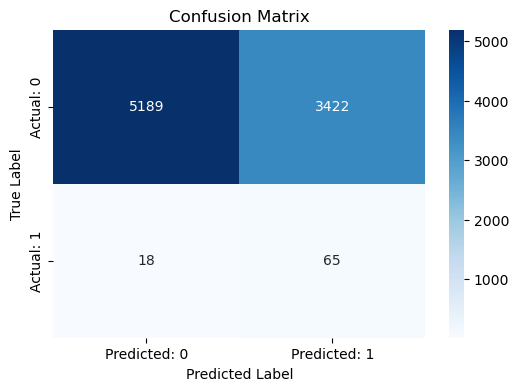

In [60]:
cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 7.2.2 RandomForest

In [62]:
rf=RandomForestClassifier()
rf.fit(x_train_smote,y_train_smote)
rf_pred=rf.predict(x_test)
rf_accuracy=accuracy_score(y_test,rf_pred)
print(f'Accuracy_score:{rf_accuracy:.4f}')

Accuracy_score:0.9530


In [63]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      8611
           1       0.09      0.45      0.15        83

    accuracy                           0.95      8694
   macro avg       0.54      0.70      0.56      8694
weighted avg       0.99      0.95      0.97      8694



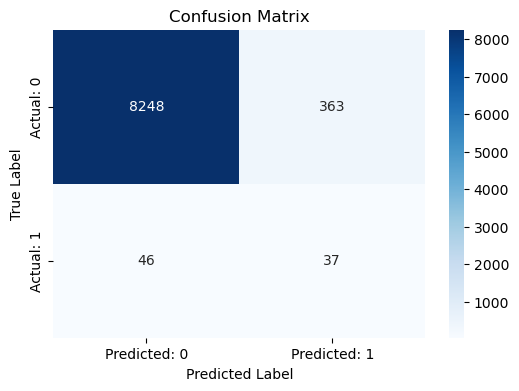

In [64]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 7.2.3.XGB 

In [66]:
xgb=XGBClassifier()
xgb.fit(x_train_smote,y_train_smote)
xgb_pred=xgb.predict(x_test)
xgb_accuracy=accuracy_score(y_test,xgb_pred)
print(f'Accuracy_score:{rf_accuracy:.4f}')

Accuracy_score:0.9530


In [67]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      8611
           1       0.08      0.61      0.13        83

    accuracy                           0.92      8694
   macro avg       0.54      0.77      0.55      8694
weighted avg       0.99      0.92      0.95      8694



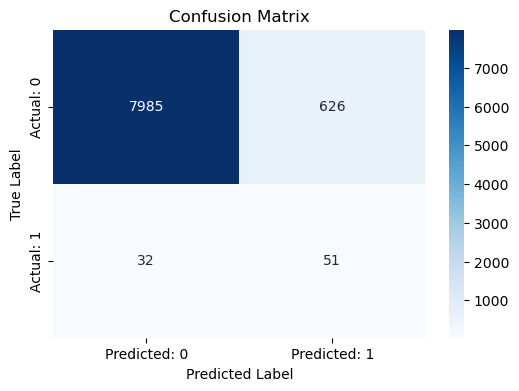

In [68]:
cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 7.2.4.SVC

In [70]:
svc_model = SVC()  
svc_model.fit(x_train_smote, y_train_smote)

svc_pred = svc_model.predict(x_test)
svc_accuracy=accuracy_score(y_test,svc_pred)
print(f'Accuracy_score:{svc_accuracy:.4f}')

Accuracy_score:0.9565


In [71]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      8611
           1       0.11      0.48      0.17        83

    accuracy                           0.96      8694
   macro avg       0.55      0.72      0.58      8694
weighted avg       0.99      0.96      0.97      8694



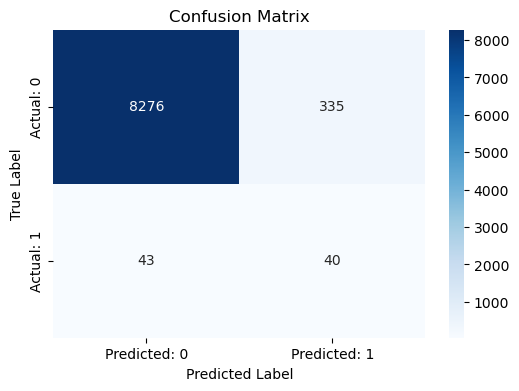

In [72]:
cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### 7.2.5.Model Comparison Report

In [74]:
comparison_dict = {'Model': ['LogisticRegression','RandomForestClassifier','XGBClassifier','SVC'],
                   'accuracy_score': [lr_accuracy,rf_accuracy,xgb_accuracy,svc_accuracy]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

                 Model  accuracy_score
    LogisticRegression        0.604325
RandomForestClassifier        0.952956
         XGBClassifier        0.924316
                   SVC        0.956522


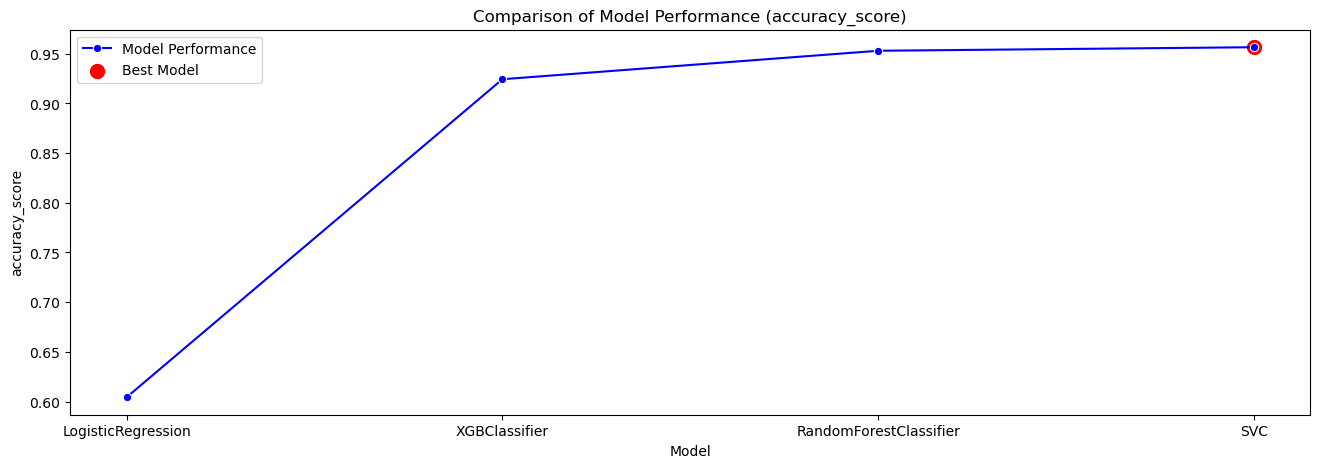

In [75]:

comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

### 8. To forecast incident volumes for better resource planning.

#### 8.1 Quarterly Forecasting

In [78]:
df2=data.copy()

In [79]:
df2

CI_Name  CI_Cat  CI_Subcat        WBS Incident_ID  Status  Impact  \
0      SUB000508      11         57  WBS000162   IM0000004       0       4   
1      WBA000124       1         57  WBS000088   IM0000005       0       3   
3      WBA000124       1         57  WBS000088   IM0000011       0       4   
4      WBA000124       1         57  WBS000088   IM0000012       0       4   
5      WBA000124       1         57  WBS000088   IM0000013       0       4   
...          ...     ...        ...        ...         ...     ...     ...   
46601  SBA000464       1         45  WBS000073   IM0047053       0       4   
46602  SBA000461       1         45  WBS000073   IM0047054       0       4   
46603  LAP000019       3         21  WBS000091   IM0047055       0       5   
46604  WBA000058       1         57  WBS000073   IM0047056       0       4   
46605  DCE000077       6          6  WBS000267   IM0047057       0       3   

       Urgency  Priority  number_cnt  Category  KB_number  \
0            4       4.0    0.601292         1  KM0000553   
1            3       3.0    0.415050         1  KM0000611   
3            4       4.0    0.642927         1  KM0000611   
4            4       4.0    0.345258         1  KM0000611   
5            4       4.0    0.006676         1  KM0000611   
...        ...       ...         ...       ...        ...   
46601        4       4.0    0.231896         1  KM0001314   
46602        4       4.0    0.805153         1  KM0002360   
46603        5       5.0    0.917466         1  KM0000315   
46604        4       4.0    0.701278         1  KM0001287   
46605        3       3.0    0.902320         1  KM0000182   

       No_of_Reassignments         Open_Time     Resolved_Time  \
0                     26.0  05-02-2012 13:32  04-11-2013 13:50   
1                     33.0  12-03-2012 15:44  02-12-2013 12:36   
3                     13.0  17-07-2012 11:49  14-11-2013 09:31   
4                      2.0  10-08-2012 11:01  08-11-2013 13:55   
5                      4.0  10-08-2012 11:27  08-11-2013 13:54   
...                    ...               ...               ...   
46601                  0.0  31-03-2014 16:23  31-03-2014 16:29   
46602                  0.0  31-03-2014 15:03  31-03-2014 15:29   
46603                  0.0  31-03-2014 15:28  31-03-2014 15:32   
46604                  0.0  31-03-2014 15:35  31-03-2014 15:42   
46605                  0.0  31-03-2014 17:24  31-03-2014 22:47   

             Close_Time Handle_Time_hrs  Closure_Code  \
0      04-11-2013 13:51  3,87,16,91,111             6   
1      02-12-2013 12:36  4,35,47,86,389            10   
3      14-11-2013 09:31  4,32,18,33,333             5   
4      08-11-2013 13:55  3,38,39,03,333             6   
5      08-11-2013 13:54  3,38,34,36,944             6   
...                 ...             ...           ...   
46601  31-03-2014 16:29           0,095             6   
46602  31-03-2014 15:29     0,428333333            12   
46603  31-03-2014 15:32     0,071666667             1   
46604  31-03-2014 15:42     0,116944444            10   
46605  31-03-2014 22:47     0,586388889             1   

       No_of_Related_Interactions Related_Interaction  
0                             1.0           SD0000007  
1                             1.0           SD0000011  
3                             1.0           SD0000025  
4                             1.0           SD0000029  
5                             1.0           SD0000031  
...                           ...                 ...  
46601                         1.0           SD0147021  
46602                         1.0           SD0146967  
46603                         1.0           SD0146982  
46604                         1.0           SD0146986  
46605                         1.0           SD0147088  

[43467 rows x 20 columns]

In [80]:
df2['Open_Time'] = pd.to_datetime(df2['Open_Time'],errors='coerce')

In [81]:
invalid_dates = df2['Open_Time'].isna().sum()
print(f"Number of invalid or unparseable datetime entries: {invalid_dates}")

Number of invalid or unparseable datetime entries: 26109


In [82]:
invalid_rows = df2[df2['Open_Time'].isna()]
print(invalid_rows[['Incident_ID', 'Open_Time']].head())

   Incident_ID Open_Time
3    IM0000011       NaT
6    IM0000014       NaT
7    IM0000015       NaT
10   IM0000019       NaT
14   IM0000023       NaT


In [83]:
df2 = df2.dropna(subset=['Open_Time'])

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17358 entries, 0 to 42852
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     17358 non-null  object        
 1   CI_Cat                      17358 non-null  int32         
 2   CI_Subcat                   17358 non-null  int32         
 3   WBS                         17358 non-null  object        
 4   Incident_ID                 17358 non-null  object        
 5   Status                      17358 non-null  int32         
 6   Impact                      17358 non-null  int32         
 7   Urgency                     17358 non-null  int32         
 8   Priority                    17358 non-null  float64       
 9   number_cnt                  17358 non-null  float64       
 10  Category                    17358 non-null  int32         
 11  KB_number                   17358 non-null  object        


In [85]:
df2['Quarter'] = df2['Open_Time'].dt.to_period('Q')
quarterly_data = df2.groupby('Quarter')['Incident_ID'].count().reset_index()
quarterly_data 

Quarter  Incident_ID
0   2012Q1            3
1   2012Q2            2
2   2012Q3            1
3   2012Q4            4
4   2013Q1         2244
5   2013Q2         2550
6   2013Q3         2177
7   2013Q4         2559
8   2014Q1         1303
9   2014Q2         2481
10  2014Q3         1667
11  2014Q4         2367

In [86]:
quarterly_data['Quarter'] = quarterly_data['Quarter'].dt.to_timestamp()
quarterly_data.set_index('Quarter', inplace=True)

In [87]:
quarterly_data

Incident_ID
Quarter                
2012-01-01            3
2012-04-01            2
2012-07-01            1
2012-10-01            4
2013-01-01         2244
2013-04-01         2550
2013-07-01         2177
2013-10-01         2559
2014-01-01         1303
2014-04-01         2481
2014-07-01         1667
2014-10-01         2367

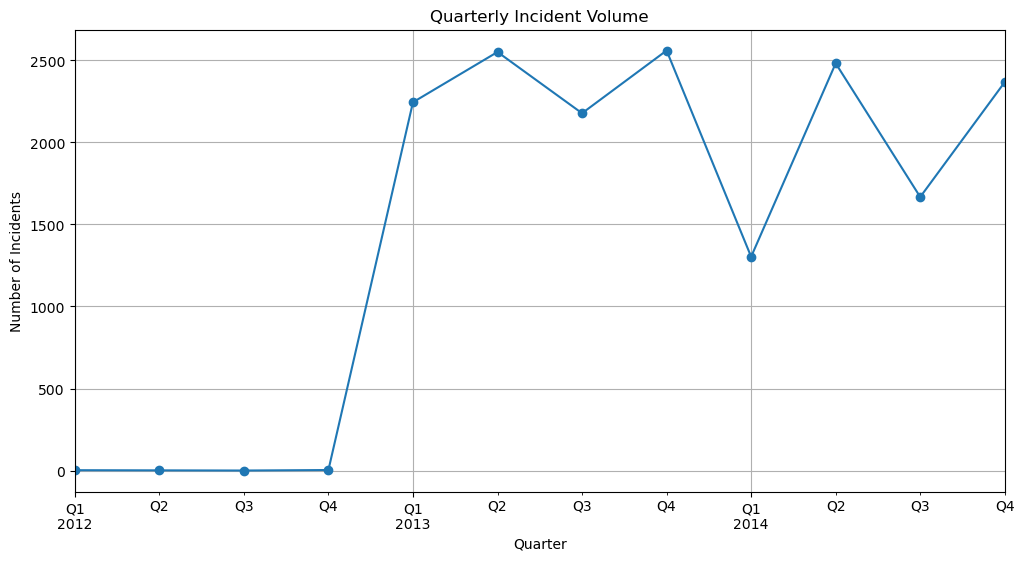

In [88]:
quarterly_data['Incident_ID'].plot(marker='o', figsize=(12, 6), title='Quarterly Incident Volume')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

#### 8.1.2 ARIMA Model

In [90]:
model = ARIMA(quarterly_data['Incident_ID'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=8)
forecast

C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


2015-01-01    2052.474506
2015-04-01    2233.641279
2015-07-01    2129.289167
2015-10-01    2189.396013
2016-01-01    2154.774453
2016-04-01    2174.716481
2016-07-01    2163.229867
2016-10-01    2169.846160
Freq: QS-OCT, Name: predicted_mean, dtype: float64

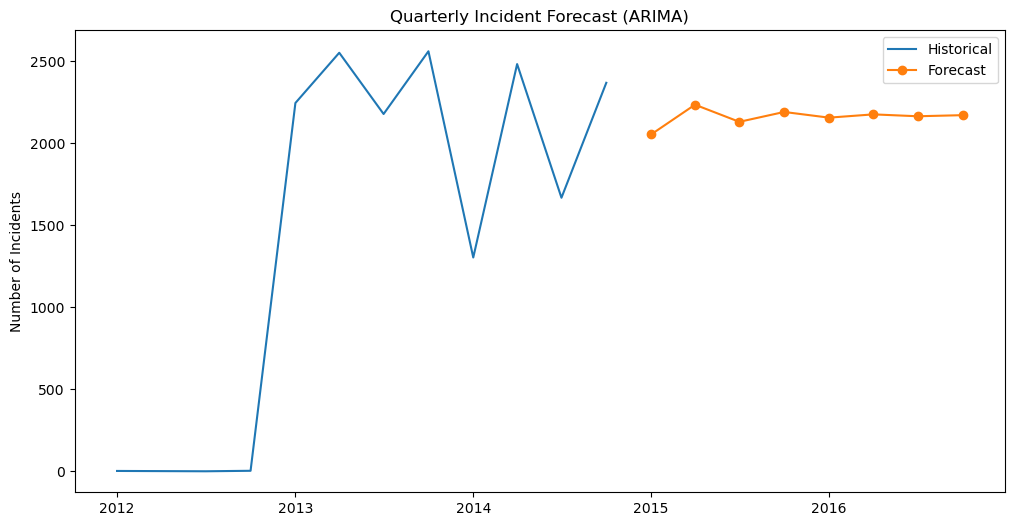

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data['Incident_ID'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('Quarterly Incident Forecast (ARIMA)')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

#### 8.1.3.SARIMAX Model

In [93]:
model = SARIMAX(quarterly_data['Incident_ID'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 4)) 

model_fit = model.fit()

sarimax_forecast = model_fit.forecast(steps=8)
sarimax_forecast

C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


2015-01-01    4176.419247
2015-04-01    4620.134247
2015-07-01    4161.551552
2015-10-01    4469.772131
2016-01-01    3376.505340
2016-04-01    4407.666020
2016-07-01    3727.564506
2016-10-01    4305.145682
Freq: QS-OCT, Name: predicted_mean, dtype: float64

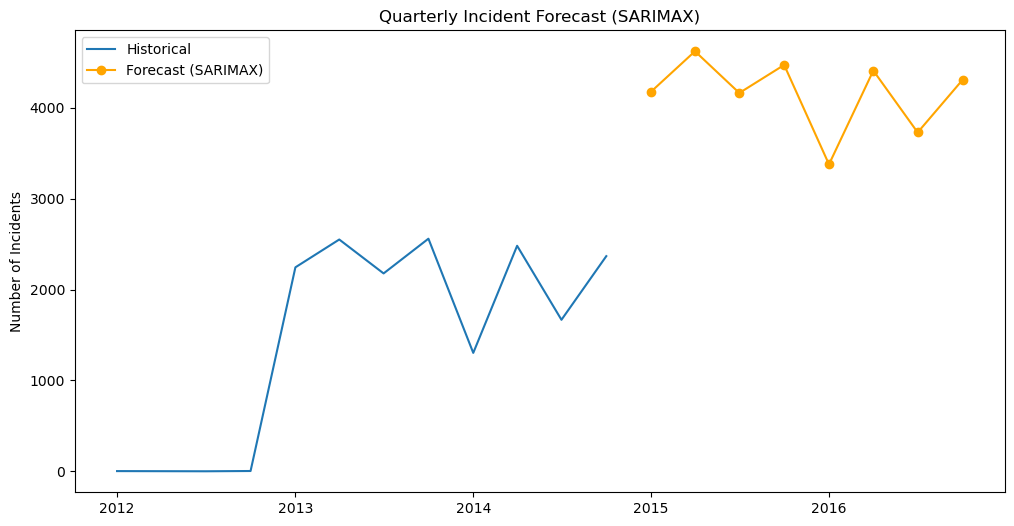

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['Incident_ID'], label='Historical')
plt.plot(sarimax_forecast.index, sarimax_forecast, label='Forecast (SARIMAX)', marker='o', color='orange')
plt.title('Quarterly Incident Forecast (SARIMAX)')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

#### 8.2.Yearly Forecasting

In [96]:
df2['Year'] = df2['Open_Time'].dt.year
annual_data = df2.groupby('Year')['Incident_ID'].count().reset_index()
annual_data

Year  Incident_ID
0  2012           10
1  2013         9530
2  2014         7818

In [97]:
annual_data['Year'] = pd.to_datetime(annual_data['Year'], format='%Y')

annual_data.set_index('Year', inplace=True)

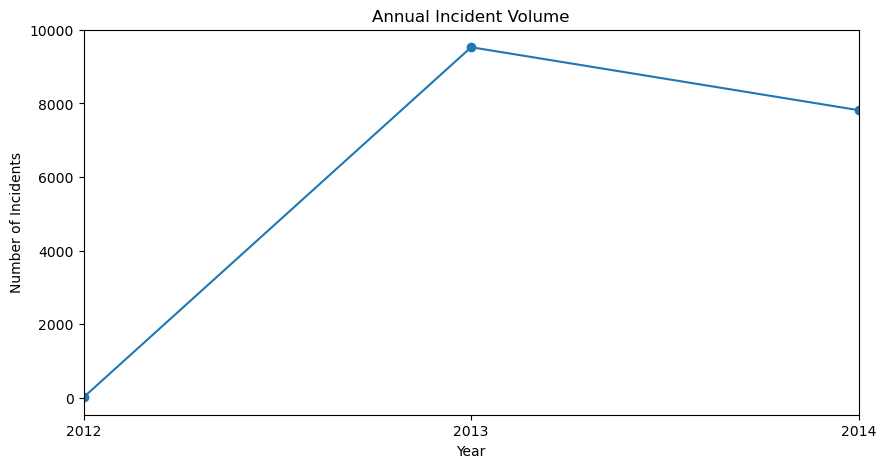

In [98]:

annual_data['Incident_ID'].plot(marker='o', figsize=(10, 5), title='Annual Incident Volume')
plt.ylabel('Number of Incidents')
plt.show()


#### 8.2.1.ARIMA Model

In [100]:
model = ARIMA(annual_data['Incident_ID'], order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=3)
forecast

C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


2015-01-01    6408.578248
2016-01-01    5542.729982
2017-01-01    5010.814521
Freq: YS-JAN, Name: predicted_mean, dtype: float64

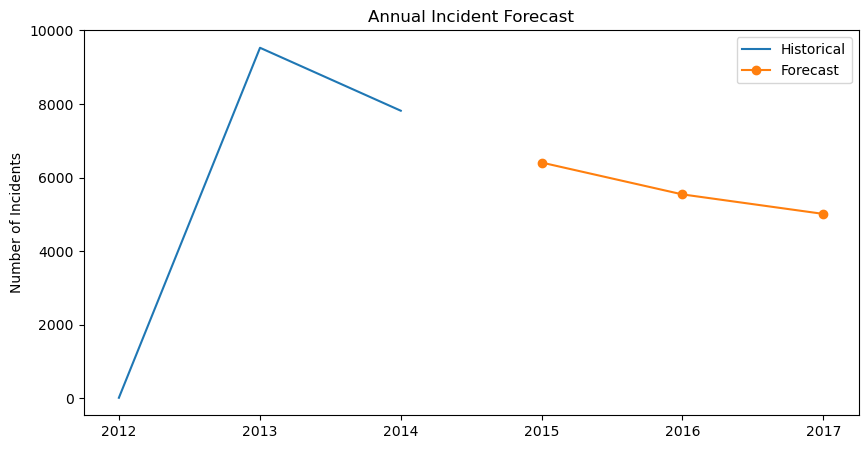

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(annual_data.index, annual_data['Incident_ID'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('Annual Incident Forecast')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

#### 8.2.2.SARIMAX Model

In [103]:
model = SARIMAX(annual_data['Incident_ID'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=3)
sarimax_forecast = forecast.predicted_mean

sarimax_forecast

C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\saran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


2015-01-01    6408.578248
2016-01-01    5542.729982
2017-01-01    5010.814521
Freq: YS-JAN, Name: predicted_mean, dtype: float64

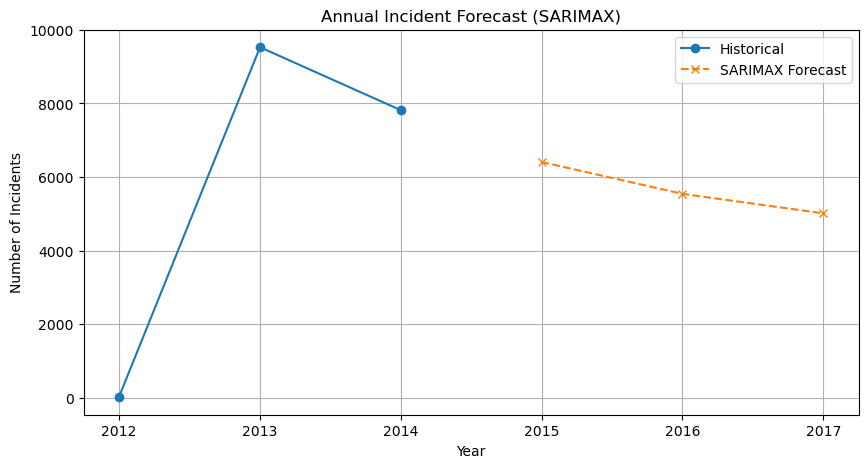

In [104]:
plt.figure(figsize=(10, 5))
plt.plot(annual_data.index, annual_data['Incident_ID'], label='Historical', marker='o')
plt.plot(sarimax_forecast.index, sarimax_forecast, label='SARIMAX Forecast', marker='x', linestyle='--')
plt.title('Annual Incident Forecast (SARIMAX)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.show()


### 9.To auto-tag tickets with the right priority and department to reduce delays.

In [106]:
df3=df1.copy()

In [107]:
Le=LabelEncoder()
df3['Priority']=le.fit_transform(df3['Priority'])

#### 9.1.Data Splitting

In [109]:
feature_cols = ['CI_Name','CI_Subcat', 'No_of_Reassignments','Status','Closure_Code', 'number_cnt']
X=df3[feature_cols]
Y=df3[['Priority','Category']]

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=y)

#### 9.2.RandomForest

In [112]:
rfbase_model = RandomForestClassifier()
multi_model = MultiOutputClassifier(rfbase_model)
multi_model.fit(X_train, Y_train)
rfy_pred = multi_model.predict(X_test)

In [113]:
priority_true = Y_test['Priority']
priority_pred = rfy_pred[:, 0]

category_true = Y_test['Category']
category_pred = rfy_pred[:, 1]


priority_acc = accuracy_score(priority_true, priority_pred)
category_acc = accuracy_score(category_true, category_pred)

rf_average_accuracy = (priority_acc + category_acc) / 2
print(f'Average accuracy across both targets: {rf_average_accuracy:.4f}')

Average accuracy across both targets: 0.8432


#### 9.3.XGB

In [115]:
le_category = LabelEncoder()
df3['Category'] = le_category.fit_transform(df3['Category'])

# Define feature and target columns
feature_cols = ['CI_Subcat', 'No_of_Reassignments', 'Status', 'Closure_Code', 'number_cnt']
X = df3[feature_cols]
Y = df3[['Priority', 'Category']]


In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [117]:
xgbbase_model = XGBClassifier()
xgbmulti_model = MultiOutputClassifier(xgbbase_model)
xgbmulti_model.fit(X_train, Y_train)
xgby_pred = xgbmulti_model.predict(X_test)

In [118]:
priority_true = Y_test['Priority']
priority_pred = xgby_pred[:, 0]

category_true = Y_test['Category']
category_pred = xgby_pred[:, 1]


priority_acc = accuracy_score(priority_true, priority_pred)
category_acc = accuracy_score(category_true, category_pred)

xgb_average_accuracy = (priority_acc + category_acc) / 2
print(f'Average accuracy across both targets: {xgb_average_accuracy:.4f}')


Average accuracy across both targets: 0.7532


#### 9.4.SVC

In [120]:
svcbase_model = SVC()
svcmulti_model = MultiOutputClassifier(svcbase_model)
svcmulti_model.fit(X_train, Y_train)
svcy_pred = svcmulti_model.predict(X_test)

In [121]:
priority_true = Y_test['Priority']
priority_pred = svcy_pred[:, 0]

category_true = Y_test['Category']
category_pred = svcy_pred[:, 1]


priority_acc = accuracy_score(priority_true, priority_pred)
category_acc = accuracy_score(category_true, category_pred)

svc_average_accuracy = (priority_acc + category_acc) / 2
print(f'Average accuracy across both targets: {svc_average_accuracy:.4f}')


Average accuracy across both targets: 0.7022


#### 9.5.KNN

In [123]:
knnmulti_model = MultiOutputClassifier(KNeighborsClassifier())
knnmulti_model.fit(X_train, Y_train)
knny_pred = knnmulti_model.predict(X_test)

In [124]:
priority_true = Y_test['Priority']
priority_pred = knny_pred[:, 0]

category_true = Y_test['Category']
category_pred = knny_pred[:, 1]


priority_acc = accuracy_score(priority_true, priority_pred)
category_acc = accuracy_score(category_true, category_pred)

knn_average_accuracy = (priority_acc + category_acc) / 2
print(f'Average accuracy across both targets: {knn_average_accuracy:.4f}')


Average accuracy across both targets: 0.7188


#### 9.6.Model Comparison Report

In [126]:
comparison_dict = {'Model': ['XGBoostClassifier','RandomForestClassifier','KNeighborsClassifier','SVC'],
                   'accuracy_score': [xgb_average_accuracy,rf_average_accuracy,knn_average_accuracy,svc_average_accuracy]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

                 Model  accuracy_score
     XGBoostClassifier        0.753221
RandomForestClassifier        0.843225
  KNeighborsClassifier        0.718772
                   SVC        0.702151


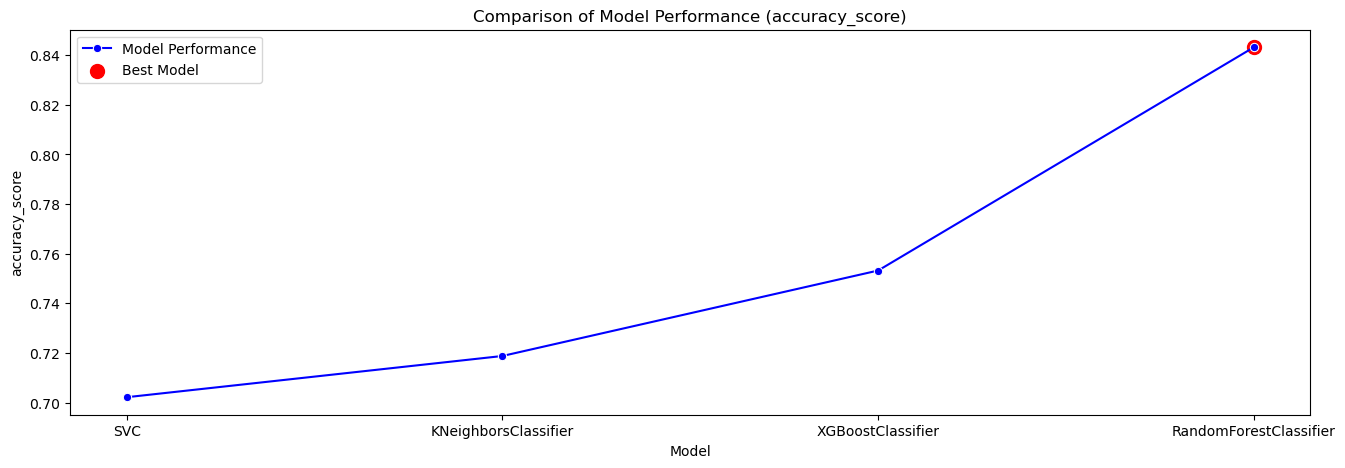

In [127]:
comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

### 10.To predict RFC failures to prevent service disruptions.

In [129]:
df4=pd.read_csv('ITSM.csv')

In [130]:
#creating a target column
df4['Closure_Code'] = df4['Closure_Code'].astype(str).str.strip().str.lower()
df4['Category'] = df4['Category'].astype(str).str.strip().str.lower()

df4['RFC_Flag'] = np.where(
    (
        ((df4['Priority'] >= 3).astype(int) + 
         (df4['No_of_Reassignments'] > 2).astype(int) + 
         (df4['Closure_Code'].isin(['other', 'software', 'unknown'])).astype(int) + 
         (df4['Category'].str.contains('change')).astype(int)
        ) >= 2
    ),
    1, 0
)

In [131]:
df4 = df4.drop(columns=[
    'Incident_ID', 'Related_Interaction', 'Related_Change', 'KB_number',
    'CI_Name', 'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
    'WBS', 'Urgency', 'Alert_Status','Handle_Time_hrs', 'No_of_Related_Incidents','No_of_Related_Changes'
], errors='ignore')

In [132]:
df4['No_of_Related_Interactions'].fillna(0, inplace=True)

In [133]:
label_cols = ['CI_Cat','CI_Subcat', 'Category', 'Closure_Code','Status']
le = LabelEncoder()

for col in label_cols:
    df4[col] = le.fit_transform(df4[col].astype(str))  

In [134]:
df4.dropna(inplace=True)
df4

CI_Cat  CI_Subcat  Status Impact  Priority  number_cnt  Category  \
0          12         57       0      4       4.0    0.601292         1   
1           1         57       0      3       3.0    0.415050         1   
3           1         57       0      4       4.0    0.642927         1   
4           1         57       0      4       4.0    0.345258         1   
5           1         57       0      4       4.0    0.006676         1   
...       ...        ...     ...    ...       ...         ...       ...   
46601       1         45       0      4       4.0    0.231896         1   
46602       1         45       0      4       4.0    0.805153         1   
46603       3         21       0      5       5.0    0.917466         1   
46604       1         57       0      4       4.0    0.701278         1   
46605       6          6       0      3       3.0    0.902320         1   

       No_of_Reassignments  Closure_Code  No_of_Related_Interactions  RFC_Flag  
0                     26.0             7                         1.0         1  
1                     33.0            11                         1.0         1  
3                     13.0             6                         1.0         1  
4                      2.0             7                         1.0         1  
5                      4.0             7                         1.0         1  
...                    ...           ...                         ...       ...  
46601                  0.0             7                         1.0         1  
46602                  0.0            13                         1.0         0  
46603                  0.0             1                         1.0         0  
46604                  0.0            11                         1.0         1  
46605                  0.0             1                         1.0         0  

[45225 rows x 11 columns]

In [135]:
df4.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Priority', 'number_cnt',
       'Category', 'No_of_Reassignments', 'Closure_Code',
       'No_of_Related_Interactions', 'RFC_Flag'],
      dtype='object')

#### 10.1.Data Splitting

In [137]:
X = df4.drop('RFC_Flag', axis=1)
y = df4['RFC_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [138]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#### 10.2.RandomForest

In [140]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10)

rf_model.fit(X_train_res, y_train_res)

y_pred = rf_model.predict(X_test)

rf_acc= accuracy_score(y_test, y_pred)
print("Accuracy:",rf_acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9969044811320755

Confusion Matrix:
 [[3926   42]
 [   0 9600]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3968
           1       1.00      1.00      1.00      9600

    accuracy                           1.00     13568
   macro avg       1.00      0.99      1.00     13568
weighted avg       1.00      1.00      1.00     13568



In [141]:
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')  # cv=5 for 5-fold cross-validation

print("Cross-validation scores: ", cv_scores)

print("Mean accuracy: ", np.mean(cv_scores))
print("Standard deviation of accuracy: ", np.std(cv_scores))

Cross-validation scores:  [0.99458264 0.99259259 0.9960199  0.9946932  0.99613046]
Mean accuracy:  0.9948037589828636
Standard deviation of accuracy:  0.0012798050749353539


In [142]:
print(df4['RFC_Flag'].value_counts())

RFC_Flag
1    31741
0    13484
Name: count, dtype: int64


#### 10.3.Logistic Regression

In [144]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
log_acc= accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:",log_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8203125
Confusion Matrix:
 [[1929 2039]
 [ 399 9201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.49      0.61      3968
           1       0.82      0.96      0.88      9600

    accuracy                           0.82     13568
   macro avg       0.82      0.72      0.75     13568
weighted avg       0.82      0.82      0.80     13568



#### 10.4.KNN

In [146]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
knn_acc=accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9906397405660378
Confusion Matrix:
 [[3886   82]
 [  45 9555]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3968
           1       0.99      1.00      0.99      9600

    accuracy                           0.99     13568
   macro avg       0.99      0.99      0.99     13568
weighted avg       0.99      0.99      0.99     13568



#### 10.5.SVC

In [148]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
svc_acc= accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:",svc_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))


SVC Accuracy: 0.8098466981132075
Confusion Matrix:
 [[1574 2394]
 [ 186 9414]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.40      0.55      3968
           1       0.80      0.98      0.88      9600

    accuracy                           0.81     13568
   macro avg       0.85      0.69      0.71     13568
weighted avg       0.83      0.81      0.78     13568



#### 10.6.Model Comparison Report

In [150]:
comparison_dict = {'Model': ['LogisticRegression','RandomForestClassifier','KNeighborsClassifier','SVC'],
                   'accuracy_score': [log_acc,rf_acc,knn_acc,svc_acc]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

                 Model  accuracy_score
    LogisticRegression        0.820312
RandomForestClassifier        0.996904
  KNeighborsClassifier        0.990640
                   SVC        0.809847


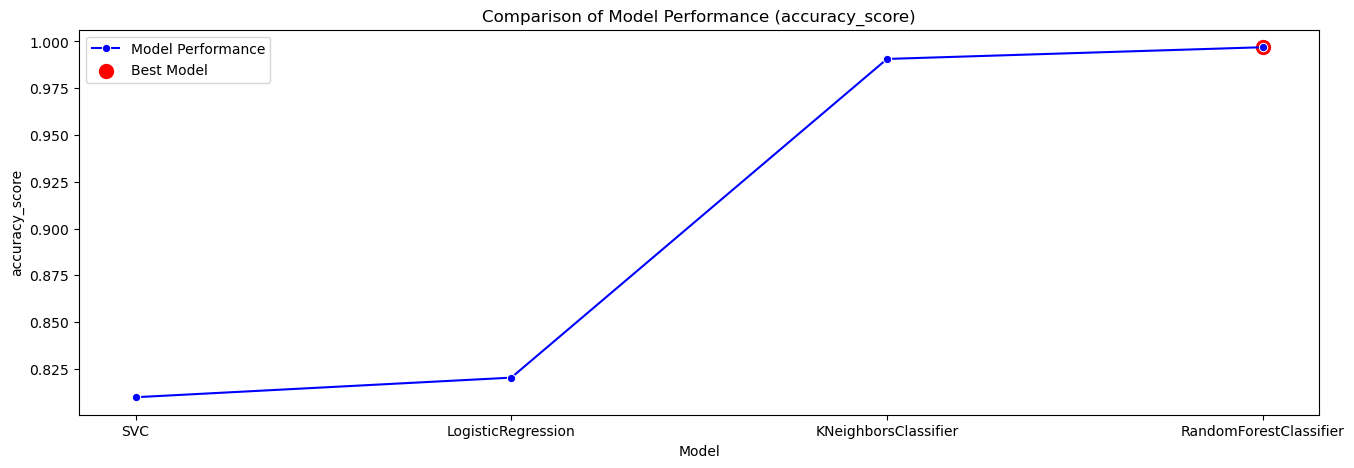

In [151]:
comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

### 11.Conclusion

1. Predict High-Priority Incidents:
- Approach Used: Classification models including Random Forest, Logistic Regression, XGBoost, SVM, etc., along with SMOTE to handle class imbalance.
- The models effectively identified high-priority incidents, especially after addressing class imbalance. Random Forest and XGBoost gave strong accuracy, enabling proactive responses.

2. Forecast Incident Volumes:
- Approach Used: Time series forecasting using ARIMA and SARIMAX at both quarterly and annual levels.
- The models provided reliable forecasts for future incident volumes, supporting resource and workforce planning. SARIMAX performed better due to its ability to handle seasonality and exogenous variables.

3. Auto-Tagging Tickets with Priority and Category:
- Approach Used: MultiOutputClassifier with Random Forest and XGBoost for joint prediction of Priority and Category.
- The model successfully automated tagging of tickets, reducing manual errors and delays. Random Forest with hyperparameter tuning delivered good accuracy across both targets.

4. Predict RFC Failures or Misconfigurations:
- Approach Used: Classification models considered but hindered by severe class imbalance (e.g., only 1 RFC failure out of thousands).
- The Random Forest model delivers excellent performance with ~99.6% accuracy and strong cross-validation stability. It effectively predicts RFC failures and asset misconfigurations.

#### Project Details:
##### Client: ABC Tech | Category: ITSM - ML
##### Project Ref: PM-PR-0012
##### Team ID: PTID-CDS-JAN-25-2365
##### Submitted by:
###### UNNAMALAI SARANYA R.